# Palette design

The palette is parametrized in the [Oklch color space](https://en.wikipedia.org/wiki/Oklab_color_space) by two lightness levels at which chroma is maximized. The primary colors shown below are generated using the default values of these parameters.

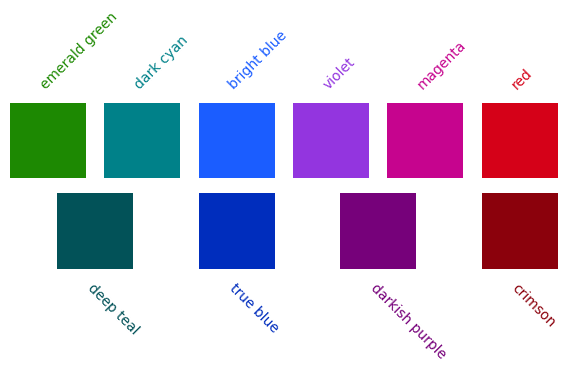

In [ ]:
from vakio import *
import vakio.view as view
palette = create_palette()
view.hexes(
    palette[metadata.DARK_COLORS[1:]], 
    palette[metadata.BRIGHT_COLORS]
)

Colors are labeled based on the closest [XKCD color](https://xkcd.com/color/rgb/). 

## Color generation

__Dark colors__ have uniform lightness in the Oklch space. They are the cusp points at the boundary of the [sRGB space](https://en.wikipedia.org/wiki/SRGB), together with two interpolated points. One of the interpolated points is between blue and red, and the other is between green and blue. Colors can be tuned with the `shifts` parameter. __Bright colors__ are generated in the same manner but with greater uniform lightness and with two interpolated points between blue and red.

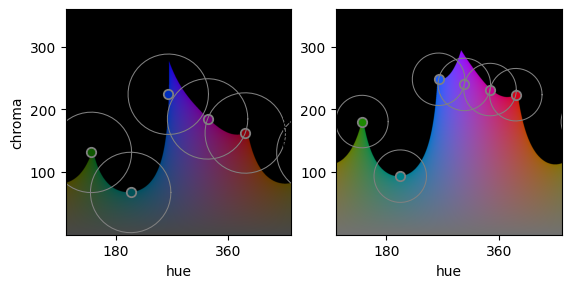

In [ ]:
import matplotlib.pyplot as plt
import vakio.plot as plot
from vakio.alg import generate

dark = generate(0.4, shifts=[-0.05 if i == 2 else 0 for i in range(5)])
bright = generate(0.55, n_magenta=2)
_, axs = plt.subplots(1, 2)
plt.sca(axs[0]); plot.colors(dark)
plt.sca(axs[1]); plot.colors(bright)

All circles have the same radius given by the distance between nearest pair of colors.

## Full palette

At low lightness levels, colors between red and green look brownish. These are not used in the palette. Instead two additional colors are added manually. Further, as the generated green has lower chroma than blue and red, one green color with high chroma is added. The default choices are XKCD colors goldenrod, pumpkin, and green, shown below.

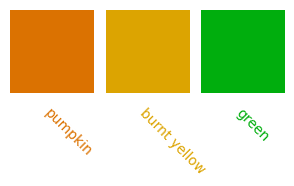

In [ ]:
view.hexes(palette[metadata.MANUAL_COLORS])

These extra colors enable, in particular, rendering of rainbow brackets. 

In [ ]:
view.cycle_colors(6 * '(', palette[metadata.RAINBOW])

Gray shades are generated based on `L_bright`, together with a fixed black shade and a fixed shade of light grey. In addition, two whitish shades are added manually. The default choices are Dark 5 (pure black), Light 3, Light 2 and Light 1 (pure white) from [Adwaita color palette](https://en.wikipedia.org/wiki/Adwaita_(design_language)#Color), shown below.

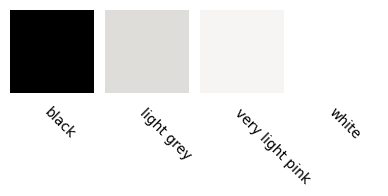

In [ ]:
view.hexes(palette[metadata.MANUAL_GREYS], colored_labels=False)

The full scale of greys is obtained via linear interpolation in lightness in the Oklch space, setting c and h to zero.
Two dark grey shades are interpolated between black and `L_bright` and five between `L_bright` and light grey.

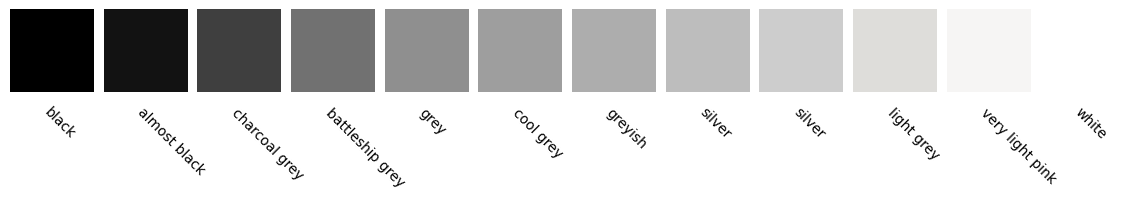

In [ ]:
view.hexes(palette[metadata.GREYS], colored_labels=False)

## Semantics

The palette is mapped to semantics close to those in [Catppuccin](https://github.com/catppuccin/catppuccin/blob/main/docs/style-guide.md), with the following differencies 

* Catppuccin semantic classes _Operators, Enum Variants_ and _On Hover Links_ are merged
* Catppuccin semantic classes _Keywords_ and _Followed Links, Active Line Number_ are merged
* Certain colors are not mapped to Catppuccin palette (those without 🐱 below) 

In [ ]:
view.palette(palette)

■,text,#000000,0,black,#️⃣0 (Black) 🐱Text
■,params,#0f5801,40,deep green,🐱Parameters
■,functions,#002dbd,40,true blue,"#️⃣4 (Blue) 🐱Methods, Functions, Properties, Links, URLs, Tags"
■,operators,#1b5dff,55,bright blue,"#️⃣12 (Bright Blue) 🌈4 (Blue) 🐱Operators, Enum Variants, On Hover Links"
■,keywords,#76017a,40,darkish purple,"#️⃣5 (Magenta) 🐱Keywords, Followed Links, Active Line Number"
■,classes,#8b010c,40,crimson,"#️⃣1 (Red) 🐱Warnings, Classes, Interfaces, Annotations, Metadata, Enums, Types, Attributes"
■,subtle,#8f8f8f,65,grey,"#️⃣7 (White) 🐱Subtle, Line Numbers"
■,comments,#717171,55,battleship grey,"#️⃣8 (Bright Black) 🐱Comments, Braces, Delimiters"
■,strings,#1d8902,55,emerald green,"#️⃣2 (Green) 🐱Success, Strings"
■,escapes,#008189,55,dark cyan,"#️⃣14 (Bright Cyan) 🐱Escape Sequences, Regex"
■,constants,#9335df,55,violet,"🌈5 (Violet) 🐱Constants, Numbers, Warnings"


The columns are _semantic name_, hex value, lightness as percentage, XKCD name, and description. The description consists of:

* Mapping to the ANSI colors for terminals #️⃣
* Mapping to the colors of rainbow for rainbow brackets 🌈
* Mapping to Catppuccin semantic classes for syntax coloring 🐱

Dark colors are favored over bright ones in syntax coloring. Perhaps the most unusual choice is using deep green for Parameters. The rationale is that then local variables have typically similar color: black or deep green. 